In [7]:
import pickle
import dill
import random
import pandas as pd 
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt


metrics_path=f"results/standard_experiments/experiment_1/metrics.pkl"

with open(metrics_path, "rb") as f:
  metrics=dill.load(f)

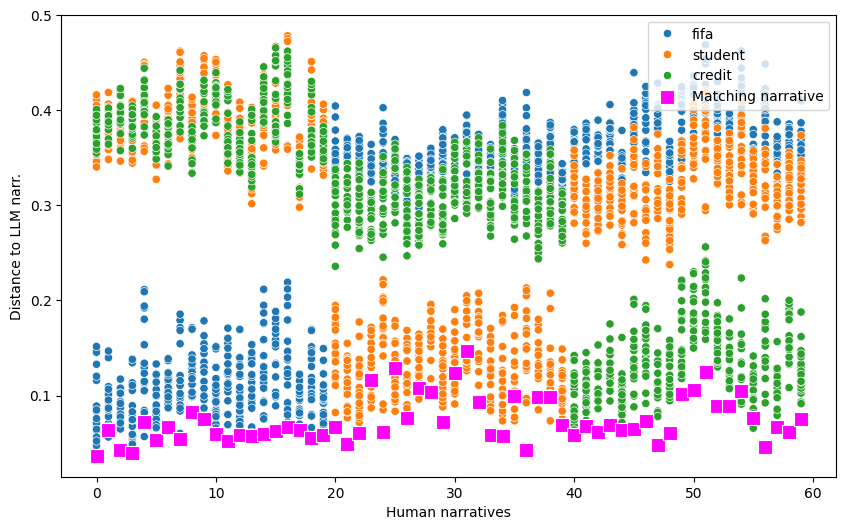

In [8]:
def filter_experiments(id, experiments: list):

    
    filtered_experiments=[experiment for experiment in experiments if experiment.id==id]

    if len(filtered_experiments)!=1:
        print(f"Something wrong length of filtered experiments is {len(filtered_experiments)}")
    return filtered_experiments[0]


gen_model="gpt-4o"
prompt_type="long"
tar_model="RF"


hu_embeddings=[]
available_embeddings=[]
embedding_model='voyage-large-2-instruct'
dataset_order=["fifa","student","credit"]
ds_classes=["fifa"]*20+["student"]*20+["credit"]*20

def embedding_fig(X,Y,ds_classes):

    scatter_data = {
    'Index': [],
    'Distance': [],
    'Class':[]
    }
    matching_data={
    'Index': [],
    'Distance': [],
    'Class': []
    }
    for i, x in enumerate(X):
        for j,y in enumerate(Y):
            scatter_data['Index'].append(i)
            scatter_data['Distance'].append(distance.cosine(x,y))
            scatter_data['Class'].append(ds_classes[j])

    for i, (x, y) in enumerate(zip(X, Y)):
        matching_data['Index'].append(i)
        matching_data['Distance'].append(distance.cosine(x, y))
        matching_data['Class'].append(ds_classes[i])

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x='Index', y='Distance', data=scatter_data,hue="Class")
    sns.scatterplot(x='Index', y='Distance', data=matching_data,  color="magenta",marker="s",s=100, label="Matching narrative")

    ax.set_xlabel('Human narratives')
    ax.set_ylabel('Distance to LLM narr.')
    # ax.set_title('Scatter Plot of f(X, Y) for Each Index in X and Y in Y')
    # ax.legend(title='')
    ax.legend(loc="upper right")

    return fig, scatter_data, matching_data


for dataset in dataset_order:

    id=(dataset,tar_model,gen_model, prompt_type)
    id_hu=(dataset,tar_model,"human", prompt_type)

    metric=filter_experiments(id, metrics)
    hu_benchmark=filter_experiments(id_hu, metrics ) 
    

    available_idx=hu_benchmark.idx_list
    all_idx=metric.idx_list
    iloc_available_idx=[i for i in range(len(all_idx)) if all_idx[i] in available_idx]

    embedding_list=metric.embeddings_dict[embedding_model]
    hu_embeddings+=hu_benchmark.embeddings_dict[embedding_model]
    available_embeddings+=[ embedding_list[iloc] for iloc in iloc_available_idx ]
    
fig,scatter_data, matching_data=embedding_fig(hu_embeddings, available_embeddings,ds_classes)


Check how many were the smallest

Output into csv for tikz

In [9]:
SAVE=True

if SAVE==True:
    # Assuming scatter_data and matching_data are dictionaries
    # Convert scatter_data to a DataFrame
    scatter_df = pd.DataFrame(scatter_data)
    scatter_df.round(3).to_csv(f'results/figures/metrics_validation/cosine_scatter_data.csv', index=False)

    # # Convert matching_data to a DataFrame
    matching_df = pd.DataFrame(matching_data)
    matching_df.round(3).to_csv('results/figures/metrics_validation/cosine_matching_data.csv', index=False)

In [10]:
scatter_df = pd.DataFrame(scatter_data)
matching_df = pd.DataFrame(matching_data)

In [11]:
count=0
for index in scatter_df.Index.unique():
    df=scatter_df[scatter_df.Index==index]
    mindistance=df["Distance"].min()
    if mindistance==matching_df[matching_df.Index==index]["Distance"].item():
        count+=1
print(count)


42


DO THE SAME FOR BLEURT


In [12]:
scatter_data=pd.read_csv("results/figures/metrics_validation/bleurt_scatter_data.csv")
matching_data=pd.read_csv("results/figures/metrics_validation/bleurt_matching_data.csv")
scatter_df = pd.DataFrame(scatter_data)
matching_df = pd.DataFrame(matching_data)

count=0
for index in scatter_df.Index.unique():
    df=scatter_df[scatter_df.Index==index]
    mindistance=df["Distance"].max()
    if mindistance==matching_df[matching_df.Index==index]["Distance"].item():
        count+=1
print(count)


29
